<a href="https://colab.research.google.com/github/jtorom/jtorom/blob/develop/Rocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importaci n Libreria de Google Drive
from google.colab import drive
#Acceso al directorio de Drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis')
#Descarga de las librerias de Mask RCNN de matterport
#!git clone https://github.com/matterport/Mask_RCNN
if not os.path.exists('/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/Mask-RCNN'):
  !git clone https://github.com/masc-it/Mask-RCNN.git


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd Mask-RCNN
#!pip list
!pip3 install -r requirements.txt
!python3 setup.py install

/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/Mask-RCNN
ERROR: Could not find a version that satisfies the requirement numpy==2.19.2 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.21.2, 1.21.3, 1.21.4, 1.21.5, 1.21.6, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0rc1, 1.23.0rc2, 1.23.0rc3, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23.4, 1.23.5, 1.24.0rc1, 1.24.0rc2, 1.24.0, 1.24.1, 1.24.2, 1.24.3, 1.24.4, 1.25.0rc1, 1.25.0, 1.25.1, 1.25.2, 1.26.0b1, 1.

In [3]:
#Descarga de la matriz de pesos COCO.h5
if not os.path.exists('/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/Mask-RCNN/cocoapi'):
  !git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
%cd ../../


/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/Mask-RCNN/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-cpython-310
creating build/temp.linux-x86_64-cpython-310/pycocotools
x86_64-linux-gnu-gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/lib/python3.10/dist-packages/numpy/core/include -I../common -I/usr/include/python3.10 -c ../common/maskApi.c -o build/temp.linux-x86_64-cpython-310/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wmisleading-indentation-Wmisleading-indentation]8;;]
   46 |       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v=

In [4]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)


from tensorflow.python.client import device_lib
with tf.device('/device:GPU:0'):
  print('Hola GPU')



Hola GPU


In [5]:
import skimage as ski
print(ski.__version__)
with tf.device('/device:GPU:0'):
  if not (ski.__version__=="0.16.2"):
    !pip uninstall --yes scikit-image
    !pip install scikit-image==0.16.2
    os.kill(os.getpid(), 9)


0.16.2


In [6]:

import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import cv2
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import json
import imgaug
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Dense,Flatten , Conv2D , MaxPooling2D , Dropout
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import datetime

In [7]:
ROOT_DIR = os.path.abspath('/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis')

sys.path.append(ROOT_DIR)

In [8]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/Mask-RCNN/')
from mrcnn.config import Config
from mrcnn import utils
os.chdir('/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/Mask-RCNN/mrcnn/')
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log
%matplotlib inline

In [9]:

# Directorio donde se guaradaran los logs y los modelos de entrenamiento [en root dir- logs]
#MODEL_DIR = os.path.abspath('/content/logs')
MODEL_DIR = os.path.abspath('/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/logs')

if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)


# Directorio donde se guardara el archivo de pesos COCO.h5
COCO_MODEL_PATH = os.path.abspath('/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/logs/mask_rcnn_coco.h5')


In [10]:
# Se comprueba que se haya descargado correctamente el archivo COCO.h5
if os.path.exists(os.path.join(COCO_MODEL_PATH)):
  print("coco model exist")
%cd /content/drive/MyDrive/Colab Notebooks/WorkspaceTesis
!ls

coco model exist
/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis
 8433365521_9252889f9a_z.jpg			    events.out.tfevents.1700080742.48232b430e14
 ColorPanoptic.png				   'Kaggle y Maskrcnn.ipynb'
 convnext_large_kmax_deeplab_coco_train_unlabeled   logs
 data						    Mask-RCNN
 DeeepLab_COCO.py				    mask_rcnn_coco.h5
 DeepLab_COCO.ipynb				    sample2.jpg
 deeplabv3_xception_tf_dim_ordering_tf_kernels.h5   sphx_glr_plot_visualization_utils_001.png


In [11]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
DATA_DIR = os.path.abspath('/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/')

In [12]:
#Craci n de los directorios de validaci n , test y train
os.chdir('/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/')
DATASET_TRAIN_DIR=os.path.join(DATA_DIR,'Train')
DATASET_VAL_DIR=os.path.join(DATA_DIR,'Validation')
DATASET_TEST_DIR=os.path.join(DATA_DIR,'Test')


#Crea com una configuraci n a partir de tensorflow, ConfigProto()
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)



In [13]:
path='/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train'
imageSize = [350, 536]
sizeEpochSteps = 94 ##mismo valor que la cantidad de img en train

def ajustarTamano(path):
  os.chdir(path)
  for i,f in enumerate(os.listdir('.')):

    file_name, file_extension = os.path.splitext(f)
    #print(file_extension)
    if os.path.isfile(f) and file_extension=='.jpg':

      image_path_jpg = f
      #print(image_path_jpg)
      img = tf.io.read_file(image_path_jpg)
      #print(img.get_shape().as_list()) # []
      img = tf.image.decode_jpeg(img)
      #print(img.get_shape().as_list())
      img_resized = tf.image.resize(img, (imageSize))
      img_resized = img_resized.eval(session=session)
      #print(type(img_resized))
      img_resized_tensor = tf.reshape(img_resized, [imageSize[0], imageSize[1]] )
      img_resized = img_resized_tensor.eval(session=session)
      cv2.imwrite(f, img_resized)


#path='/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train'
#ajustarTamano(path)
#path='/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Test'
#ajustarTamano(path)
#path='/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation'
#ajustarTamano(path)

In [14]:
#Creacin de las clases partiendo de config
class Rocks(Config):
  # Definici n de la clase general
  NAME ="rock_Data"
  # Se ajusta n mero de imagenes a cada GPU.
  IMAGES_PER_GPU = 1
  # Defino n m e r o de clases incluyendo el background
  NUM_CLASSES = 2 #Background + rock"
  # Numero de steps por cada epoca
  STEPS_PER_EPOCH = sizeEpochSteps # Se pone el mismo n mero de imagenes que hay en la carpeta Train
  # Precisi n del sistema (en el proceso de validaci n)
  DETECTION_MIN_CONFIDENCE = 0.30
  # MiniMask
  USE_MINI_MASK = True
  IMAGE_SHAPE = imageSize
  BATCH_SIZE =10
  LEARNING_RATE=0.005

In [15]:
config = Rocks()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.3
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.005
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE          

In [16]:
from PIL import Image,ImageDraw
axis_Width = 15

In [17]:
#Hereda de la clase Dataset en el fichero utils.
class RocksDataset(utils.Dataset):

  def load_dataset(self, dataset_dir):

    self.add_class('dataset', 1, 'rock')

    for i, filename in enumerate(os.listdir(dataset_dir)):
      annotation_file = os.path.join(dataset_dir , filename.replace('.jpg', '.json'))
      if '.jpg' in filename and os.path.isfile(annotation_file):
        self.add_image('dataset',image_id=i,path=os.path.join(dataset_dir , filename),annotation=annotation_file)

  def extract_masks(self, filename):
    json_file = os.path.join(filename) #Devuelve el nombre del fichero con string->’.
    with open(json_file) as f:
      img_anns = json.load(f)
    n_masks = 0
    for anno in img_anns['shapes']:
      if anno['label']=='rock':
        n_masks+=1#
    masks = np.zeros([img_anns['imageHeight'], img_anns['imageWidth'], n_masks], dtype='uint8')
    classes = []#
    i=0
    for anno in img_anns['shapes']:
      if anno['label']=='rock':
        mask = np.zeros([img_anns['imageHeight'], img_anns['imageWidth']], dtype=np.uint8)
        cv2.fillPoly(mask, np.array([anno['points']], dtype=np.int32), 1)
        masks[:, :, i] = mask
        classes.append(self.class_names.index(anno['label']))
        i+=1
    return masks , classes

  # Carga las m scaras para una imagen
  def load_mask(self, image_id):
    info = self.image_info[image_id]
    path = info['annotation']
    masks, classes = self.extract_masks(path)
    return masks, np.asarray(classes, dtype='int32')

  def image_reference(self, image_id):
    info = self.image_info[image_id]
    return info['path']




In [18]:
dataset_train = RocksDataset()
dataset_train.load_dataset(DATASET_TRAIN_DIR)
dataset_train.prepare()


In [19]:
#Para comprobar que las imagenes se han cargado bien
print("Image Count: {}".format(len(dataset_train.image_ids)))
print("Class Count: {}".format(dataset_train.num_classes))
for i, info in enumerate(dataset_train.class_info):
  print("{:3}. {:50}".format(i, info['name']))


Image Count: 94
Class Count: 2
  0. BG                                                
  1. rock                                              


In [20]:
# Validation set
dataset_val = RocksDataset()
dataset_val.load_dataset(DATASET_VAL_DIR)
dataset_val.prepare()

In [21]:
#Para comprobar que las imagenes se han cargado bien
print("Image Count: {}".format(len(dataset_val.image_ids)))
print("Class Count: {}".format(dataset_val.num_classes))
for i, info in enumerate(dataset_val.class_info):
  print("{:3}. {:50}".format(i, info['name']))

Image Count: 11
Class Count: 2
  0. BG                                                
  1. rock                                              


In [22]:
#Test set
dataset_test = RocksDataset()
dataset_test.load_dataset(DATASET_TEST_DIR)
dataset_test.prepare()
print('Test: %d images' % len(dataset_test.image_ids))

Test: 8 images


In [23]:
#Para comprobar que las imagenes se han cargado bien
print("Image Count: {}".format(len(dataset_test.image_ids)))
print("Class Count: {}".format(dataset_test.num_classes))
for i, info in enumerate(dataset_test.class_info):
  print("{:3}. {:50}".format(i, info['name']))


Image Count: 8
Class Count: 2
  0. BG                                                
  1. rock                                              


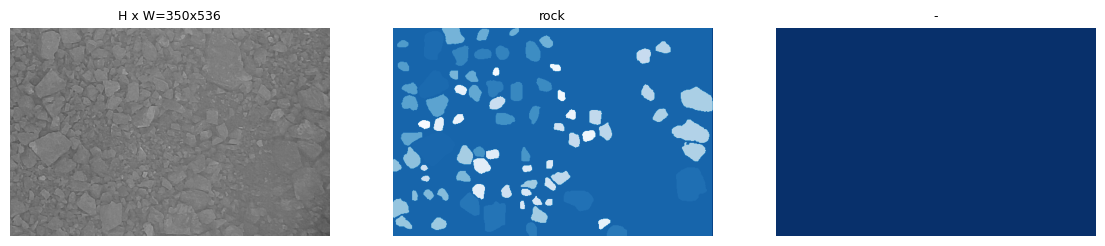

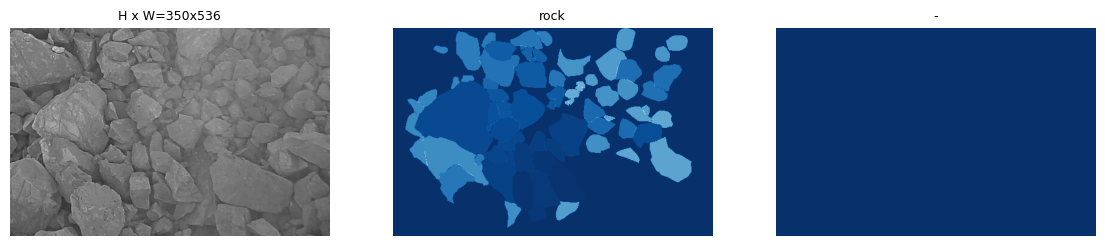

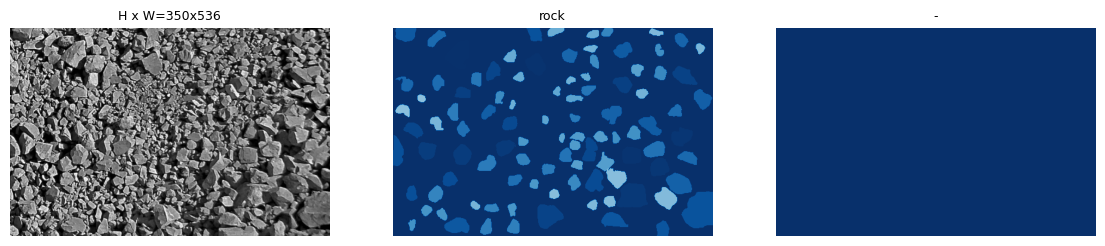

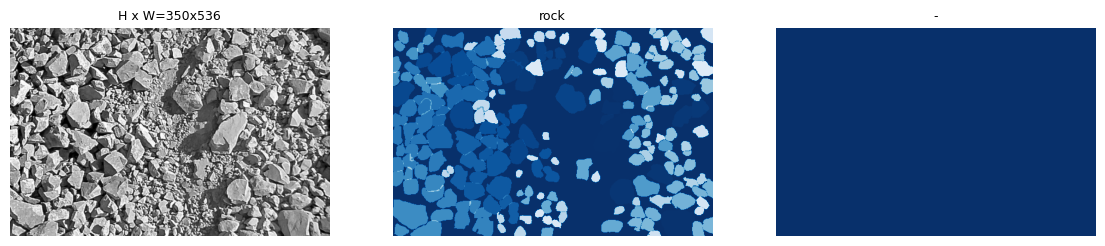

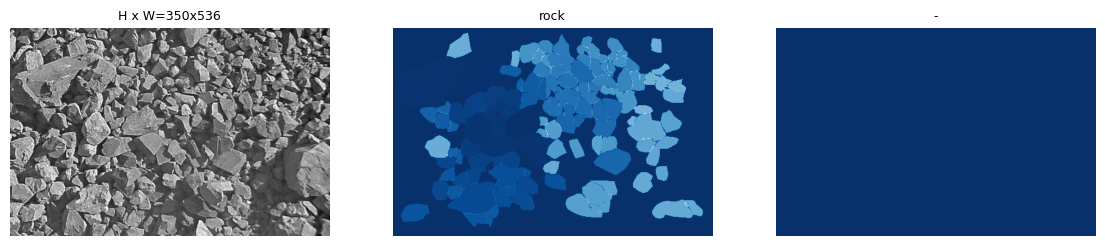

In [24]:
#Selecciona 5 im genes aleatorias i las visualiza con sus correspondientes m scaras
image_ids=np.random.choice(dataset_train.image_ids,5)
for image_id in image_ids:
  image = dataset_train.load_image(image_id)
  mask, class_ids = dataset_train.load_mask(image_id)
  visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names,2)





In [25]:
# Crea el modelo del tarining mode
model = modellib.MaskRCNN(mode="training", config=config , model_dir=MODEL_DIR)
model.find_last()

self.model_dir: /content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/logs
Dir_names: ['mask_rcnn', 'rock20231115T0632', 'rock20231115T1724', 'rock20231115T2053', 'rock20231116T0402', 'rock20231116T0546', 'rock20231116T1659', 'rock20231117T2339', 'rock20231118T0111', 'rock20231118T0258', 'rock20231118T0337', 'rock20231118T2004', 'rock20231118T2220', 'rock_data20231119T0008', 'rock_data20231119T0451', 'rock_data20231120T1354', 'rock_data20231122T1435', 'rock_data20231122T1714', 'rock_data20231122T1929', 'rock_data20231122T2033']


'/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/logs/rock_data20231122T2033/mask_rcnn_rock_data_0006.h5'

In [26]:
#Selecci n de las matrices de peso (coco o la ltima conseguida)
init_with = "coco"

In [27]:
if init_with == "imagenet":
  model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
  #Excluyo par metros que no me interesan
  model.load_weights(COCO_MODEL_PATH, by_name=True,exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
  model.load_weights(model.find_last(), by_name=True)
  !pip list


In [28]:
Rock_augmentation = imgaug.augmenters.Sometimes(0.9,[imgaug.augmenters.geometric.Affine(rotate=(-360,360))])


In [29]:

hora_actual = datetime.datetime.now()
print(hora_actual)

with tf.device('/device:GPU:0'):
  model.train(
        dataset_train
      , dataset_val
      , learning_rate=config.LEARNING_RATE
      , epochs=6
      , layers='heads'
      , augmentation = Rock_augmentation
      )
hora_actual = datetime.datetime.now()
print(hora_actual)

2023-11-22 21:28:16.593351

Starting at epoch 0. LR=0.005

Checkpoint Path: /content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/logs/rock_data20231122T2128/mask_rcnn_rock_data_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistribute

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Workers
8
Epoch 1/6


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 184) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 184) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

 2/94 [..............................] - ETA: 14s - batch: 0.5000 - size: 1.0000 - loss: 4.2302 - rpn_class_loss: 0.6677 - rpn_bbox_loss: 0.4817 - mrcnn_class_loss: 0.9148 - mrcnn_bbox_loss: 0.9253 - mrcnn_mask_loss: 1.2406        

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 74) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


 4/94 [>.............................] - ETA: 15s - batch: 1.5000 - size: 1.0000 - loss: 3.7204 - rpn_class_loss: 0.5922 - rpn_bbox_loss: 0.4763 - mrcnn_class_loss: 0.8182 - mrcnn_bbox_loss: 0.8648 - mrcnn_mask_loss: 0.9690

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 74) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


 5/94 [>.............................] - ETA: 15s - batch: 2.0000 - size: 1.0000 - loss: 3.5275 - rpn_class_loss: 0.5433 - rpn_bbox_loss: 0.4757 - mrcnn_class_loss: 0.7902 - mrcnn_bbox_loss: 0.8194 - mrcnn_mask_loss: 0.8989

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 74) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


 8/94 [=>............................] - ETA: 14s - batch: 3.5000 - size: 1.0000 - loss: 3.1435 - rpn_class_loss: 0.4452 - rpn_bbox_loss: 0.4644 - mrcnn_class_loss: 0.7404 - mrcnn_bbox_loss: 0.7133 - mrcnn_mask_loss: 0.7802

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 74) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 74) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

12/94 [==>...........................] - ETA: 13s - batch: 5.5000 - size: 1.0000 - loss: 2.7628 - rpn_class_loss: 0.4011 - rpn_bbox_loss: 0.4106 - mrcnn_class_loss: 0.6234 - mrcnn_bbox_loss: 0.6266 - mrcnn_mask_loss: 0.7011

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 74) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


32/94 [=========>....................] - ETA: 13s - batch: 15.5000 - size: 1.0000 - loss: 2.3790 - rpn_class_loss: 0.3372 - rpn_bbox_loss: 0.4044 - mrcnn_class_loss: 0.5711 - mrcnn_bbox_loss: 0.5015 - mrcnn_mask_loss: 0.5648

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 166) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 166) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

40/94 [===========>..................] - ETA: 44s - batch: 19.5000 - size: 1.0000 - loss: 2.2753 - rpn_class_loss: 0.3214 - rpn_bbox_loss: 0.3954 - mrcnn_class_loss: 0.5489 - mrcnn_bbox_loss: 0.4690 - mrcnn_mask_loss: 0.5406

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

48/94 [==============>...............] - ETA: 43s - batch: 23.5000 - size: 1.0000 - loss: 2.1543 - rpn_class_loss: 0.2967 - rpn_bbox_loss: 0.3911 - mrcnn_class_loss: 0.5294 - mrcnn_bbox_loss: 0.4333 - mrcnn_mask_loss: 0.5037

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 95) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 95) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

56/94 [================>.............] - ETA: 40s - batch: 27.5000 - size: 1.0000 - loss: 2.1218 - rpn_class_loss: 0.3262 - rpn_bbox_loss: 0.3884 - mrcnn_class_loss: 0.5211 - mrcnn_bbox_loss: 0.4153 - mrcnn_mask_loss: 0.4707

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

64/94 [===================>..........] - ETA: 35s - batch: 31.5000 - size: 1.0000 - loss: 2.0547 - rpn_class_loss: 0.3100 - rpn_bbox_loss: 0.3779 - mrcnn_class_loss: 0.5138 - mrcnn_bbox_loss: 0.4006 - mrcnn_mask_loss: 0.4524

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

72/94 [=====================>........] - ETA: 28s - batch: 35.5000 - size: 1.0000 - loss: 1.9794 - rpn_class_loss: 0.2902 - rpn_bbox_loss: 0.3700 - mrcnn_class_loss: 0.5116 - mrcnn_bbox_loss: 0.3794 - mrcnn_mask_loss: 0.4282

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

80/94 [========================>.....] - ETA: 20s - batch: 39.5000 - size: 1.0000 - loss: 1.9323 - rpn_class_loss: 0.2745 - rpn_bbox_loss: 0.3618 - mrcnn_class_loss: 0.5119 - mrcnn_bbox_loss: 0.3661 - mrcnn_mask_loss: 0.4180

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 149) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 149) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

88/94 [===========================>..] - ETA: 9s - batch: 43.5000 - size: 1.0000 - loss: 1.9225 - rpn_class_loss: 0.2769 - rpn_bbox_loss: 0.3700 - mrcnn_class_loss: 0.5093 - mrcnn_bbox_loss: 0.3574 - mrcnn_mask_loss: 0.4089 

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

94/94 [==============================] - ETA: 0s - batch: 46.5000 - size: 1.0000 - loss: 1.9092 - rpn_class_loss: 0.2772 - rpn_bbox_loss: 0.3663 - mrcnn_class_loss: 0.5052 - mrcnn_bbox_loss: 0.3544 - mrcnn_mask_loss: 0.4061

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 184) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 184) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

94/94 [==============================] - 429s 4s/step - batch: 46.5000 - size: 1.0000 - loss: 1.9092 - rpn_class_loss: 0.2772 - rpn_bbox_loss: 0.3663 - mrcnn_class_loss: 0.5052 - mrcnn_bbox_loss: 0.3544 - mrcnn_mask_loss: 0.4061 - val_loss: 2.1864 - val_rpn_class_loss: 0.5824 - val_rpn_bbox_loss: 0.4086 - val_mrcnn_class_loss: 0.4279 - val_mrcnn_bbox_loss: 0.3827 - val_mrcnn_mask_loss: 0.3848
Epoch 2/6
 2/94 [..............................] - ETA: 14s - batch: 0.5000 - size: 1.0000 - loss: 1.9956 - rpn_class_loss: 0.2952 - rpn_bbox_loss: 0.4534 - mrcnn_class_loss: 0.5912 - mrcnn_bbox_loss: 0.3261 - mrcnn_mask_loss: 0.3297    

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


 3/94 [..............................] - ETA: 14s - batch: 1.0000 - size: 1.0000 - loss: 1.9839 - rpn_class_loss: 0.2813 - rpn_bbox_loss: 0.4471 - mrcnn_class_loss: 0.6161 - mrcnn_bbox_loss: 0.3106 - mrcnn_mask_loss: 0.3288

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


10/94 [==>...........................] - ETA: 13s - batch: 4.5000 - size: 1.0000 - loss: 1.7002 - rpn_class_loss: 0.2465 - rpn_bbox_loss: 0.3598 - mrcnn_class_loss: 0.4959 - mrcnn_bbox_loss: 0.2922 - mrcnn_mask_loss: 0.3058

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


22/94 [======>.......................] - ETA: 12s - batch: 10.5000 - size: 1.0000 - loss: 1.7118 - rpn_class_loss: 0.2798 - rpn_bbox_loss: 0.3119 - mrcnn_class_loss: 0.4951 - mrcnn_bbox_loss: 0.2980 - mrcnn_mask_loss: 0.3270

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


24/94 [======>.......................] - ETA: 11s - batch: 11.5000 - size: 1.0000 - loss: 1.7258 - rpn_class_loss: 0.2816 - rpn_bbox_loss: 0.3171 - mrcnn_class_loss: 0.4931 - mrcnn_bbox_loss: 0.3018 - mrcnn_mask_loss: 0.3322

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


25/94 [======>.......................] - ETA: 11s - batch: 12.0000 - size: 1.0000 - loss: 1.7373 - rpn_class_loss: 0.2862 - rpn_bbox_loss: 0.3217 - mrcnn_class_loss: 0.4947 - mrcnn_bbox_loss: 0.3029 - mrcnn_mask_loss: 0.3318

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


27/94 [=======>......................] - ETA: 11s - batch: 13.0000 - size: 1.0000 - loss: 1.7370 - rpn_class_loss: 0.2887 - rpn_bbox_loss: 0.3228 - mrcnn_class_loss: 0.4937 - mrcnn_bbox_loss: 0.3012 - mrcnn_mask_loss: 0.3305

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


30/94 [========>.....................] - ETA: 10s - batch: 14.5000 - size: 1.0000 - loss: 1.7057 - rpn_class_loss: 0.2837 - rpn_bbox_loss: 0.3195 - mrcnn_class_loss: 0.4850 - mrcnn_bbox_loss: 0.2937 - mrcnn_mask_loss: 0.3237

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


77/94 [=======================>......] - ETA: 4s - batch: 38.0000 - size: 1.0000 - loss: 1.5028 - rpn_class_loss: 0.1948 - rpn_bbox_loss: 0.2996 - mrcnn_class_loss: 0.4680 - mrcnn_bbox_loss: 0.2476 - mrcnn_mask_loss: 0.2927

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 149) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


80/94 [========================>.....] - ETA: 4s - batch: 39.5000 - size: 1.0000 - loss: 1.4947 - rpn_class_loss: 0.1912 - rpn_bbox_loss: 0.2980 - mrcnn_class_loss: 0.4693 - mrcnn_bbox_loss: 0.2454 - mrcnn_mask_loss: 0.2908

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 149) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 149) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

83/94 [=========================>....] - ETA: 4s - batch: 41.0000 - size: 1.0000 - loss: 1.5048 - rpn_class_loss: 0.1948 - rpn_bbox_loss: 0.3037 - mrcnn_class_loss: 0.4694 - mrcnn_bbox_loss: 0.2456 - mrcnn_mask_loss: 0.2912

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

87/94 [==========================>...] - ETA: 3s - batch: 43.0000 - size: 1.0000 - loss: 1.5001 - rpn_class_loss: 0.1919 - rpn_bbox_loss: 0.3066 - mrcnn_class_loss: 0.4667 - mrcnn_bbox_loss: 0.2437 - mrcnn_mask_loss: 0.2913

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


88/94 [===========================>..] - ETA: 2s - batch: 43.5000 - size: 1.0000 - loss: 1.4974 - rpn_class_loss: 0.1907 - rpn_bbox_loss: 0.3064 - mrcnn_class_loss: 0.4661 - mrcnn_bbox_loss: 0.2429 - mrcnn_mask_loss: 0.2913

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

89/94 [===========================>..] - ETA: 2s - batch: 44.0000 - size: 1.0000 - loss: 1.5033 - rpn_class_loss: 0.1913 - rpn_bbox_loss: 0.3104 - mrcnn_class_loss: 0.4667 - mrcnn_bbox_loss: 0.2431 - mrcnn_mask_loss: 0.2919

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


94/94 [==============================] - ETA: 0s - batch: 46.5000 - size: 1.0000 - loss: 1.4933 - rpn_class_loss: 0.1890 - rpn_bbox_loss: 0.3081 - mrcnn_class_loss: 0.4634 - mrcnn_bbox_loss: 0.2412 - mrcnn_mask_loss: 0.2915

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 184) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 184) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

94/94 [==============================] - 241s 3s/step - batch: 46.5000 - size: 1.0000 - loss: 1.4933 - rpn_class_loss: 0.1890 - rpn_bbox_loss: 0.3081 - mrcnn_class_loss: 0.4634 - mrcnn_bbox_loss: 0.2412 - mrcnn_mask_loss: 0.2915 - val_loss: 2.1283 - val_rpn_class_loss: 0.5823 - val_rpn_bbox_loss: 0.4203 - val_mrcnn_class_loss: 0.4005 - val_mrcnn_bbox_loss: 0.3110 - val_mrcnn_mask_loss: 0.4142
Epoch 3/6
 2/94 [..............................] - ETA: 14s - batch: 0.5000 - size: 1.0000 - loss: 1.7855 - rpn_class_loss: 0.3609 - rpn_bbox_loss: 0.4323 - mrcnn_class_loss: 0.4654 - mrcnn_bbox_loss: 0.2231 - mrcnn_mask_loss: 0.3038    

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


29/94 [========>.....................] - ETA: 11s - batch: 14.0000 - size: 1.0000 - loss: 1.5732 - rpn_class_loss: 0.2465 - rpn_bbox_loss: 0.3204 - mrcnn_class_loss: 0.4672 - mrcnn_bbox_loss: 0.2472 - mrcnn_mask_loss: 0.2919

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


31/94 [========>.....................] - ETA: 11s - batch: 15.0000 - size: 1.0000 - loss: 1.5565 - rpn_class_loss: 0.2400 - rpn_bbox_loss: 0.3176 - mrcnn_class_loss: 0.4672 - mrcnn_bbox_loss: 0.2432 - mrcnn_mask_loss: 0.2885

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


61/94 [==================>...........] - ETA: 6s - batch: 30.0000 - size: 1.0000 - loss: 1.3823 - rpn_class_loss: 0.1756 - rpn_bbox_loss: 0.2862 - mrcnn_class_loss: 0.4277 - mrcnn_bbox_loss: 0.2201 - mrcnn_mask_loss: 0.2728

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


62/94 [==================>...........] - ETA: 7s - batch: 30.5000 - size: 1.0000 - loss: 1.3784 - rpn_class_loss: 0.1743 - rpn_bbox_loss: 0.2848 - mrcnn_class_loss: 0.4272 - mrcnn_bbox_loss: 0.2198 - mrcnn_mask_loss: 0.2722

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

64/94 [===================>..........] - ETA: 8s - batch: 31.5000 - size: 1.0000 - loss: 1.3670 - rpn_class_loss: 0.1712 - rpn_bbox_loss: 0.2819 - mrcnn_class_loss: 0.4239 - mrcnn_bbox_loss: 0.2190 - mrcnn_mask_loss: 0.2710

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

70/94 [=====================>........] - ETA: 10s - batch: 34.5000 - size: 1.0000 - loss: 1.3523 - rpn_class_loss: 0.1664 - rpn_bbox_loss: 0.2793 - mrcnn_class_loss: 0.4265 - mrcnn_bbox_loss: 0.2126 - mrcnn_mask_loss: 0.2674

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

72/94 [=====================>........] - ETA: 10s - batch: 35.5000 - size: 1.0000 - loss: 1.3419 - rpn_class_loss: 0.1632 - rpn_bbox_loss: 0.2772 - mrcnn_class_loss: 0.4256 - mrcnn_bbox_loss: 0.2104 - mrcnn_mask_loss: 0.2656

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

78/94 [=======================>......] - ETA: 11s - batch: 38.5000 - size: 1.0000 - loss: 1.3457 - rpn_class_loss: 0.1579 - rpn_bbox_loss: 0.2798 - mrcnn_class_loss: 0.4309 - mrcnn_bbox_loss: 0.2105 - mrcnn_mask_loss: 0.2666

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 149) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 149) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

80/94 [========================>.....] - ETA: 10s - batch: 39.5000 - size: 1.0000 - loss: 1.3416 - rpn_class_loss: 0.1554 - rpn_bbox_loss: 0.2796 - mrcnn_class_loss: 0.4313 - mrcnn_bbox_loss: 0.2096 - mrcnn_mask_loss: 0.2658

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 149) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 149) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

82/94 [=========================>....] - ETA: 9s - batch: 40.5000 - size: 1.0000 - loss: 1.3488 - rpn_class_loss: 0.1577 - rpn_bbox_loss: 0.2818 - mrcnn_class_loss: 0.4331 - mrcnn_bbox_loss: 0.2100 - mrcnn_mask_loss: 0.2662 

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 149) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your i

83/94 [=========================>....] - ETA: 8s - batch: 41.0000 - size: 1.0000 - loss: 1.3520 - rpn_class_loss: 0.1578 - rpn_bbox_loss: 0.2829 - mrcnn_class_loss: 0.4345 - mrcnn_bbox_loss: 0.2100 - mrcnn_mask_loss: 0.2668

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


87/94 [==========================>...] - ETA: 5s - batch: 43.0000 - size: 1.0000 - loss: 1.3524 - rpn_class_loss: 0.1555 - rpn_bbox_loss: 0.2838 - mrcnn_class_loss: 0.4354 - mrcnn_bbox_loss: 0.2111 - mrcnn_mask_loss: 0.2666

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


89/94 [===========================>..] - ETA: 4s - batch: 44.0000 - size: 1.0000 - loss: 1.3554 - rpn_class_loss: 0.1557 - rpn_bbox_loss: 0.2830 - mrcnn_class_loss: 0.4365 - mrcnn_bbox_loss: 0.2123 - mrcnn_mask_loss: 0.2680

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

94/94 [==============================] - ETA: 0s - batch: 46.5000 - size: 1.0000 - loss: 1.3573 - rpn_class_loss: 0.1533 - rpn_bbox_loss: 0.2809 - mrcnn_class_loss: 0.4374 - mrcnn_bbox_loss: 0.2147 - mrcnn_mask_loss: 0.2710

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 184) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 184) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

94/94 [==============================] - 269s 3s/step - batch: 46.5000 - size: 1.0000 - loss: 1.3573 - rpn_class_loss: 0.1533 - rpn_bbox_loss: 0.2809 - mrcnn_class_loss: 0.4374 - mrcnn_bbox_loss: 0.2147 - mrcnn_mask_loss: 0.2710 - val_loss: 2.2276 - val_rpn_class_loss: 0.7022 - val_rpn_bbox_loss: 0.3821 - val_mrcnn_class_loss: 0.4148 - val_mrcnn_bbox_loss: 0.3205 - val_mrcnn_mask_loss: 0.4080
Epoch 4/6
 4/94 [>.............................] - ETA: 16s - batch: 1.5000 - size: 1.0000 - loss: 1.5135 - rpn_class_loss: 0.1934 - rpn_bbox_loss: 0.3732 - mrcnn_class_loss: 0.4126 - mrcnn_bbox_loss: 0.2517 - mrcnn_mask_loss: 0.2826

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


10/94 [==>...........................] - ETA: 14s - batch: 4.5000 - size: 1.0000 - loss: 1.3845 - rpn_class_loss: 0.1535 - rpn_bbox_loss: 0.3607 - mrcnn_class_loss: 0.3935 - mrcnn_bbox_loss: 0.2164 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


17/94 [====>.........................] - ETA: 13s - batch: 8.0000 - size: 1.0000 - loss: 1.2078 - rpn_class_loss: 0.1323 - rpn_bbox_loss: 0.2829 - mrcnn_class_loss: 0.3653 - mrcnn_bbox_loss: 0.1841 - mrcnn_mask_loss: 0.2431

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


21/94 [=====>........................] - ETA: 13s - batch: 10.0000 - size: 1.0000 - loss: 1.3324 - rpn_class_loss: 0.1374 - rpn_bbox_loss: 0.2906 - mrcnn_class_loss: 0.4059 - mrcnn_bbox_loss: 0.2178 - mrcnn_mask_loss: 0.2808

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


33/94 [=========>....................] - ETA: 11s - batch: 16.0000 - size: 1.0000 - loss: 1.3641 - rpn_class_loss: 0.1237 - rpn_bbox_loss: 0.3097 - mrcnn_class_loss: 0.4111 - mrcnn_bbox_loss: 0.2300 - mrcnn_mask_loss: 0.2896

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


59/94 [=================>............] - ETA: 6s - batch: 29.0000 - size: 1.0000 - loss: 1.2322 - rpn_class_loss: 0.1094 - rpn_bbox_loss: 0.2692 - mrcnn_class_loss: 0.3834 - mrcnn_bbox_loss: 0.2018 - mrcnn_mask_loss: 0.2683

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


62/94 [==================>...........] - ETA: 7s - batch: 30.5000 - size: 1.0000 - loss: 1.2257 - rpn_class_loss: 0.1081 - rpn_bbox_loss: 0.2670 - mrcnn_class_loss: 0.3824 - mrcnn_bbox_loss: 0.2003 - mrcnn_mask_loss: 0.2679

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

64/94 [===================>..........] - ETA: 8s - batch: 31.5000 - size: 1.0000 - loss: 1.2195 - rpn_class_loss: 0.1076 - rpn_bbox_loss: 0.2641 - mrcnn_class_loss: 0.3819 - mrcnn_bbox_loss: 0.1988 - mrcnn_mask_loss: 0.2672

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

71/94 [=====================>........] - ETA: 10s - batch: 35.0000 - size: 1.0000 - loss: 1.2046 - rpn_class_loss: 0.1015 - rpn_bbox_loss: 0.2604 - mrcnn_class_loss: 0.3888 - mrcnn_bbox_loss: 0.1931 - mrcnn_mask_loss: 0.2608

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

72/94 [=====================>........] - ETA: 10s - batch: 35.5000 - size: 1.0000 - loss: 1.2001 - rpn_class_loss: 0.1006 - rpn_bbox_loss: 0.2590 - mrcnn_class_loss: 0.3891 - mrcnn_bbox_loss: 0.1920 - mrcnn_mask_loss: 0.2595

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

79/94 [========================>.....] - ETA: 10s - batch: 39.0000 - size: 1.0000 - loss: 1.1961 - rpn_class_loss: 0.0960 - rpn_bbox_loss: 0.2588 - mrcnn_class_loss: 0.3953 - mrcnn_bbox_loss: 0.1890 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 149) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


80/94 [========================>.....] - ETA: 9s - batch: 39.5000 - size: 1.0000 - loss: 1.1945 - rpn_class_loss: 0.0951 - rpn_bbox_loss: 0.2582 - mrcnn_class_loss: 0.3959 - mrcnn_bbox_loss: 0.1886 - mrcnn_mask_loss: 0.2567 

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 149) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 149) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

82/94 [=========================>....] - ETA: 9s - batch: 40.5000 - size: 1.0000 - loss: 1.1987 - rpn_class_loss: 0.0966 - rpn_bbox_loss: 0.2603 - mrcnn_class_loss: 0.3958 - mrcnn_bbox_loss: 0.1887 - mrcnn_mask_loss: 0.2573 

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

88/94 [===========================>..] - ETA: 4s - batch: 43.5000 - size: 1.0000 - loss: 1.1972 - rpn_class_loss: 0.0943 - rpn_bbox_loss: 0.2592 - mrcnn_class_loss: 0.3978 - mrcnn_bbox_loss: 0.1884 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


89/94 [===========================>..] - ETA: 4s - batch: 44.0000 - size: 1.0000 - loss: 1.2008 - rpn_class_loss: 0.0943 - rpn_bbox_loss: 0.2592 - mrcnn_class_loss: 0.3991 - mrcnn_bbox_loss: 0.1899 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


90/94 [===========================>..] - ETA: 3s - batch: 44.5000 - size: 1.0000 - loss: 1.2014 - rpn_class_loss: 0.0941 - rpn_bbox_loss: 0.2589 - mrcnn_class_loss: 0.3995 - mrcnn_bbox_loss: 0.1900 - mrcnn_mask_loss: 0.2589

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

94/94 [==============================] - ETA: 0s - batch: 46.5000 - size: 1.0000 - loss: 1.1984 - rpn_class_loss: 0.0921 - rpn_bbox_loss: 0.2576 - mrcnn_class_loss: 0.3984 - mrcnn_bbox_loss: 0.1901 - mrcnn_mask_loss: 0.2601

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 184) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 184) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

94/94 [==============================] - 269s 3s/step - batch: 46.5000 - size: 1.0000 - loss: 1.1984 - rpn_class_loss: 0.0921 - rpn_bbox_loss: 0.2576 - mrcnn_class_loss: 0.3984 - mrcnn_bbox_loss: 0.1901 - mrcnn_mask_loss: 0.2601 - val_loss: 2.2909 - val_rpn_class_loss: 0.7293 - val_rpn_bbox_loss: 0.4391 - val_mrcnn_class_loss: 0.4837 - val_mrcnn_bbox_loss: 0.3039 - val_mrcnn_mask_loss: 0.3348
Epoch 5/6
 4/94 [>.............................] - ETA: 14s - batch: 1.5000 - size: 1.0000 - loss: 1.3343 - rpn_class_loss: 0.1407 - rpn_bbox_loss: 0.3268 - mrcnn_class_loss: 0.3881 - mrcnn_bbox_loss: 0.1997 - mrcnn_mask_loss: 0.2789

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


12/94 [==>...........................] - ETA: 14s - batch: 5.5000 - size: 1.0000 - loss: 1.1073 - rpn_class_loss: 0.1043 - rpn_bbox_loss: 0.2730 - mrcnn_class_loss: 0.3390 - mrcnn_bbox_loss: 0.1587 - mrcnn_mask_loss: 0.2322

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


13/94 [===>..........................] - ETA: 14s - batch: 6.0000 - size: 1.0000 - loss: 1.0611 - rpn_class_loss: 0.0991 - rpn_bbox_loss: 0.2594 - mrcnn_class_loss: 0.3233 - mrcnn_bbox_loss: 0.1546 - mrcnn_mask_loss: 0.2247

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


21/94 [=====>........................] - ETA: 12s - batch: 10.0000 - size: 1.0000 - loss: 1.1196 - rpn_class_loss: 0.0976 - rpn_bbox_loss: 0.2459 - mrcnn_class_loss: 0.3394 - mrcnn_bbox_loss: 0.1831 - mrcnn_mask_loss: 0.2537

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


22/94 [======>.......................] - ETA: 12s - batch: 10.5000 - size: 1.0000 - loss: 1.1371 - rpn_class_loss: 0.0955 - rpn_bbox_loss: 0.2461 - mrcnn_class_loss: 0.3454 - mrcnn_bbox_loss: 0.1903 - mrcnn_mask_loss: 0.2597

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


56/94 [================>.............] - ETA: 6s - batch: 27.5000 - size: 1.0000 - loss: 1.1189 - rpn_class_loss: 0.0680 - rpn_bbox_loss: 0.2416 - mrcnn_class_loss: 0.3682 - mrcnn_bbox_loss: 0.1852 - mrcnn_mask_loss: 0.2558

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


63/94 [===================>..........] - ETA: 8s - batch: 31.0000 - size: 1.0000 - loss: 1.1156 - rpn_class_loss: 0.0712 - rpn_bbox_loss: 0.2407 - mrcnn_class_loss: 0.3641 - mrcnn_bbox_loss: 0.1844 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

64/94 [===================>..........] - ETA: 9s - batch: 31.5000 - size: 1.0000 - loss: 1.1113 - rpn_class_loss: 0.0707 - rpn_bbox_loss: 0.2393 - mrcnn_class_loss: 0.3625 - mrcnn_bbox_loss: 0.1837 - mrcnn_mask_loss: 0.2550

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

72/94 [=====================>........] - ETA: 11s - batch: 35.5000 - size: 1.0000 - loss: 1.0881 - rpn_class_loss: 0.0663 - rpn_bbox_loss: 0.2334 - mrcnn_class_loss: 0.3653 - mrcnn_bbox_loss: 0.1760 - mrcnn_mask_loss: 0.2472

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

80/94 [========================>.....] - ETA: 10s - batch: 39.5000 - size: 1.0000 - loss: 1.0886 - rpn_class_loss: 0.0636 - rpn_bbox_loss: 0.2320 - mrcnn_class_loss: 0.3725 - mrcnn_bbox_loss: 0.1766 - mrcnn_mask_loss: 0.2438

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 149) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 149) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

83/94 [=========================>....] - ETA: 9s - batch: 41.0000 - size: 1.0000 - loss: 1.0954 - rpn_class_loss: 0.0674 - rpn_bbox_loss: 0.2349 - mrcnn_class_loss: 0.3713 - mrcnn_bbox_loss: 0.1780 - mrcnn_mask_loss: 0.2438 

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


85/94 [==========================>...] - ETA: 7s - batch: 42.0000 - size: 1.0000 - loss: 1.0963 - rpn_class_loss: 0.0673 - rpn_bbox_loss: 0.2361 - mrcnn_class_loss: 0.3711 - mrcnn_bbox_loss: 0.1780 - mrcnn_mask_loss: 0.2438

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


88/94 [===========================>..] - ETA: 5s - batch: 43.5000 - size: 1.0000 - loss: 1.0924 - rpn_class_loss: 0.0660 - rpn_bbox_loss: 0.2351 - mrcnn_class_loss: 0.3708 - mrcnn_bbox_loss: 0.1771 - mrcnn_mask_loss: 0.2435

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

89/94 [===========================>..] - ETA: 4s - batch: 44.0000 - size: 1.0000 - loss: 1.0966 - rpn_class_loss: 0.0664 - rpn_bbox_loss: 0.2354 - mrcnn_class_loss: 0.3716 - mrcnn_bbox_loss: 0.1781 - mrcnn_mask_loss: 0.2451

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

94/94 [==============================] - ETA: 0s - batch: 46.5000 - size: 1.0000 - loss: 1.0987 - rpn_class_loss: 0.0651 - rpn_bbox_loss: 0.2333 - mrcnn_class_loss: 0.3742 - mrcnn_bbox_loss: 0.1780 - mrcnn_mask_loss: 0.2481

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 184) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 184) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

94/94 [==============================] - 270s 3s/step - batch: 46.5000 - size: 1.0000 - loss: 1.0987 - rpn_class_loss: 0.0651 - rpn_bbox_loss: 0.2333 - mrcnn_class_loss: 0.3742 - mrcnn_bbox_loss: 0.1780 - mrcnn_mask_loss: 0.2481 - val_loss: 2.2260 - val_rpn_class_loss: 0.9688 - val_rpn_bbox_loss: 0.4390 - val_mrcnn_class_loss: 0.2519 - val_mrcnn_bbox_loss: 0.2511 - val_mrcnn_mask_loss: 0.3151
Epoch 6/6


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


 4/94 [>.............................] - ETA: 15s - batch: 1.5000 - size: 1.0000 - loss: 1.1934 - rpn_class_loss: 0.0608 - rpn_bbox_loss: 0.3075 - mrcnn_class_loss: 0.3515 - mrcnn_bbox_loss: 0.1885 - mrcnn_mask_loss: 0.2850

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


 9/94 [=>............................] - ETA: 14s - batch: 4.0000 - size: 1.0000 - loss: 1.0885 - rpn_class_loss: 0.0648 - rpn_bbox_loss: 0.2765 - mrcnn_class_loss: 0.3231 - mrcnn_bbox_loss: 0.1670 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


10/94 [==>...........................] - ETA: 13s - batch: 4.5000 - size: 1.0000 - loss: 1.0544 - rpn_class_loss: 0.0681 - rpn_bbox_loss: 0.2638 - mrcnn_class_loss: 0.3066 - mrcnn_bbox_loss: 0.1652 - mrcnn_mask_loss: 0.2508

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


22/94 [======>.......................] - ETA: 12s - batch: 10.5000 - size: 1.0000 - loss: 1.0346 - rpn_class_loss: 0.0643 - rpn_bbox_loss: 0.2269 - mrcnn_class_loss: 0.3066 - mrcnn_bbox_loss: 0.1812 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


25/94 [======>.......................] - ETA: 11s - batch: 12.0000 - size: 1.0000 - loss: 1.0591 - rpn_class_loss: 0.0636 - rpn_bbox_loss: 0.2315 - mrcnn_class_loss: 0.3200 - mrcnn_bbox_loss: 0.1867 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


31/94 [========>.....................] - ETA: 10s - batch: 15.0000 - size: 1.0000 - loss: 1.0473 - rpn_class_loss: 0.0606 - rpn_bbox_loss: 0.2302 - mrcnn_class_loss: 0.3265 - mrcnn_bbox_loss: 0.1822 - mrcnn_mask_loss: 0.2478

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


46/94 [=============>................] - ETA: 8s - batch: 22.5000 - size: 1.0000 - loss: 1.0289 - rpn_class_loss: 0.0557 - rpn_bbox_loss: 0.2244 - mrcnn_class_loss: 0.3343 - mrcnn_bbox_loss: 0.1719 - mrcnn_mask_loss: 0.2426

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 102) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


63/94 [===================>..........] - ETA: 8s - batch: 31.0000 - size: 1.0000 - loss: 1.0062 - rpn_class_loss: 0.0545 - rpn_bbox_loss: 0.2189 - mrcnn_class_loss: 0.3322 - mrcnn_bbox_loss: 0.1635 - mrcnn_mask_loss: 0.2371

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

64/94 [===================>..........] - ETA: 8s - batch: 31.5000 - size: 1.0000 - loss: 1.0054 - rpn_class_loss: 0.0541 - rpn_bbox_loss: 0.2180 - mrcnn_class_loss: 0.3320 - mrcnn_bbox_loss: 0.1638 - mrcnn_mask_loss: 0.2375

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

71/94 [=====================>........] - ETA: 11s - batch: 35.0000 - size: 1.0000 - loss: 0.9971 - rpn_class_loss: 0.0516 - rpn_bbox_loss: 0.2180 - mrcnn_class_loss: 0.3341 - mrcnn_bbox_loss: 0.1602 - mrcnn_mask_loss: 0.2332

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


72/94 [=====================>........] - ETA: 11s - batch: 35.5000 - size: 1.0000 - loss: 0.9946 - rpn_class_loss: 0.0512 - rpn_bbox_loss: 0.2174 - mrcnn_class_loss: 0.3342 - mrcnn_bbox_loss: 0.1594 - mrcnn_mask_loss: 0.2325

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 155) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

80/94 [========================>.....] - ETA: 10s - batch: 39.5000 - size: 1.0000 - loss: 1.0024 - rpn_class_loss: 0.0493 - rpn_bbox_loss: 0.2206 - mrcnn_class_loss: 0.3419 - mrcnn_bbox_loss: 0.1584 - mrcnn_mask_loss: 0.2323

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 149) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 149) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

82/94 [=========================>....] - ETA: 10s - batch: 40.5000 - size: 1.0000 - loss: 1.0067 - rpn_class_loss: 0.0502 - rpn_bbox_loss: 0.2221 - mrcnn_class_loss: 0.3428 - mrcnn_bbox_loss: 0.1588 - mrcnn_mask_loss: 0.2328

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


87/94 [==========================>...] - ETA: 6s - batch: 43.0000 - size: 1.0000 - loss: 1.0058 - rpn_class_loss: 0.0490 - rpn_bbox_loss: 0.2220 - mrcnn_class_loss: 0.3434 - mrcnn_bbox_loss: 0.1581 - mrcnn_mask_loss: 0.2333

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


88/94 [===========================>..] - ETA: 5s - batch: 43.5000 - size: 1.0000 - loss: 1.0030 - rpn_class_loss: 0.0486 - rpn_bbox_loss: 0.2213 - mrcnn_class_loss: 0.3427 - mrcnn_bbox_loss: 0.1576 - mrcnn_mask_loss: 0.2328

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


89/94 [===========================>..] - ETA: 4s - batch: 44.0000 - size: 1.0000 - loss: 1.0079 - rpn_class_loss: 0.0492 - rpn_bbox_loss: 0.2218 - mrcnn_class_loss: 0.3452 - mrcnn_bbox_loss: 0.1583 - mrcnn_mask_loss: 0.2334

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 63) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

94/94 [==============================] - ETA: 0s - batch: 46.5000 - size: 1.0000 - loss: 1.0147 - rpn_class_loss: 0.0488 - rpn_bbox_loss: 0.2214 - mrcnn_class_loss: 0.3466 - mrcnn_bbox_loss: 0.1606 - mrcnn_mask_loss: 0.2373

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 184) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 184) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

94/94 [==============================] - 274s 3s/step - batch: 46.5000 - size: 1.0000 - loss: 1.0147 - rpn_class_loss: 0.0488 - rpn_bbox_loss: 0.2214 - mrcnn_class_loss: 0.3466 - mrcnn_bbox_loss: 0.1606 - mrcnn_mask_loss: 0.2373 - val_loss: 2.4684 - val_rpn_class_loss: 0.6593 - val_rpn_bbox_loss: 0.3774 - val_mrcnn_class_loss: 0.7267 - val_mrcnn_bbox_loss: 0.3224 - val_mrcnn_mask_loss: 0.3826
2023-11-22 21:28:16.593351


In [30]:
hora_actual = datetime.datetime.now()
print(hora_actual)


2023-11-22 21:57:34.935862


In [31]:
with tf.device('/device:GPU:0'):
  model.train(dataset_train , dataset_val , learning_rate=config.LEARNING_RATE / 10,epochs=6, layers="all")


Starting at epoch 6. LR=0.0005

Checkpoint Path: /content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/logs/rock_data20231122T2128/mask_rcnn_rock_data_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res

In [32]:
class InferenceConfig(Rocks):
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1


In [33]:
inference_config = InferenceConfig()
model = modellib.MaskRCNN(mode="inference", config=inference_config ,model_dir=MODEL_DIR)

Instructions for updating:
Use fn_output_signature instead


In [34]:
model_path = model.find_last()
print("Loading weights from ", model_path)
model.load_weights(model_path , by_name=True)

self.model_dir: /content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/logs
Dir_names: ['mask_rcnn', 'rock20231116T0402', 'rock20231116T0546', 'rock20231116T1659', 'rock20231117T2339', 'rock20231118T0111', 'rock20231118T0258', 'rock20231118T0337', 'rock20231118T2004', 'rock20231118T2220', 'rock_data20231119T0008', 'rock_data20231119T0451', 'rock_data20231120T1354', 'rock_data20231122T1435', 'rock_data20231122T1714', 'rock_data20231122T1929', 'rock_data20231122T2033', 'rock_data20231122T2128']
Loading weights from  /content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/logs/rock_data20231122T2128/mask_rcnn_rock_data_0002.h5
Re-starting from epoch 2


In [35]:
def get_ax(rows=1, cols=1, size=10):
  _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
  return ax

dataset_val.image_ids

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [36]:
image_id=1
original_image , image_meta , gt_class_id ,gt_bbox , gt_mask = modellib.load_image_gt(dataset_val , inference_config , image_id )
#original_image , image_meta , gt_class_id ,gt_bbox , gt_mask = modellib.load_image_gt(dataset_val , inference_config , image_id, use_mini_mask=False)


log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  254.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max: 1024.00000  float64
gt_class_id              shape: (78,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (78, 4)               min:    0.00000  max: 1024.00000  int32
gt_mask                  shape: (56, 56, 78)          min:    0.00000  max:    1.00000  bool


---Image---
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
---Boxes---
[[ 519  732  601  831]
 [ 443  900  517 1007]
 [ 492  822  538  873]
 [ 586  854  634  923]
 [ 670  839  762  944]
 [ 362  822  425  879]
 [ 368  912  408  969]
 [ 303  711  462  824]
 [ 682  684  768  762]
 [ 753  755  846  883]
 [ 797  900  846  986]
 [ 634  734  670  799]
 [ 617  952  667  996]
 [ 531  468  619  581]
 [ 665  539  766  644]
 [ 751  403  810  468]
 [ 431  426  556  571]
 [ 427  684  510  747]
 [ 550  663  632  743]
 [ 615  602  678  653]
 [ 471  566  513  629]
 [ 270  525  429  636]
 [ 186  600  335  711]
 [ 370  437  441  493]
 [ 232  92

ValueError: ignored

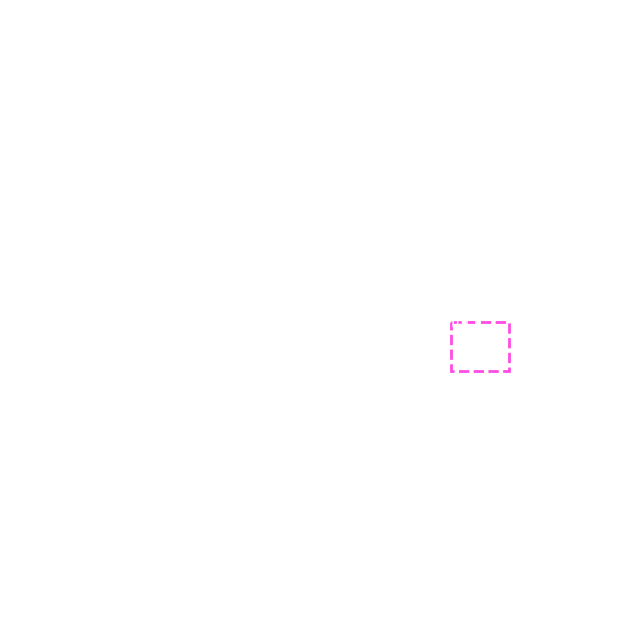

In [37]:
visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, dataset_val.class_names, figsize=(8, 8))
print(gt_class_id.shape)

In [38]:
results = model.detect([original_image], verbose=1)

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


---Image---
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
---Boxes---
[[ 650  827  765  966]
 [ 512  115  623  269]
 [ 660  532  766  651]
 [ 434  898  509 1014]
 [ 626  228  688  329]
 [ 519  465  631  595]
 [ 208  587  326  722]
 [ 325   26  443  150]
 [ 216  408  321  538]
 [ 516  358  568  445]
 [ 518   32  600  145]
 [ 515  244  630  350]
 [ 237  261  364  405]
 [ 394  197  509  327]
 [ 406  314  502  409]
 [ 193  376  285  475]
 [ 203   65  263  202]
 [ 426  410  556  568]
 [ 326  630  431  730]
 [ 507  729  607  853]
 [ 682  253  765  383]
 [ 423  684  513  757]
 [ 558    0  681  112]
 [ 421  567  477  629]
 [ 293  71

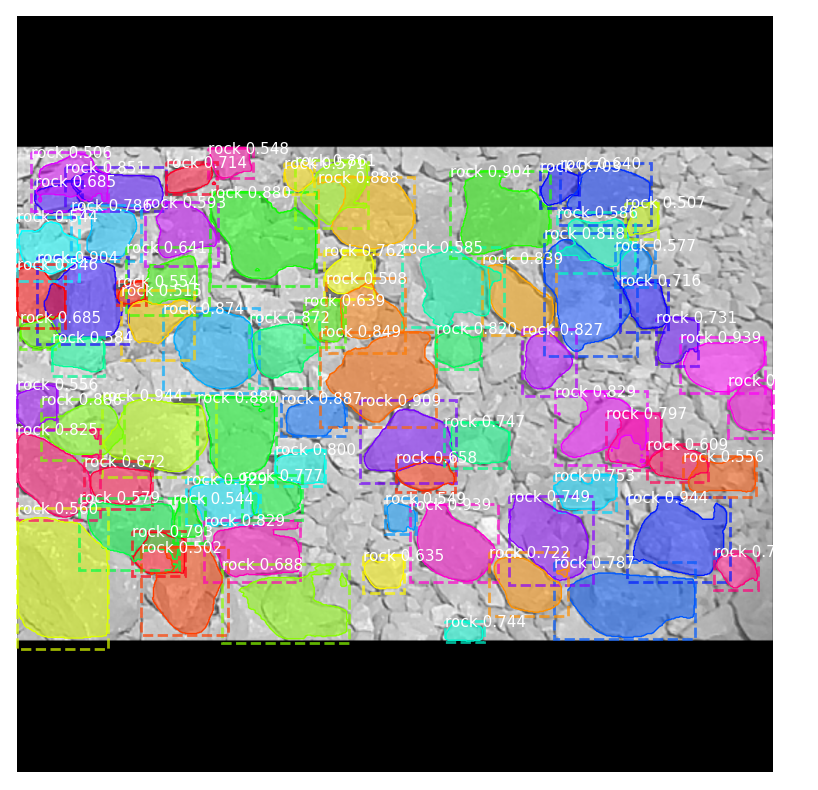

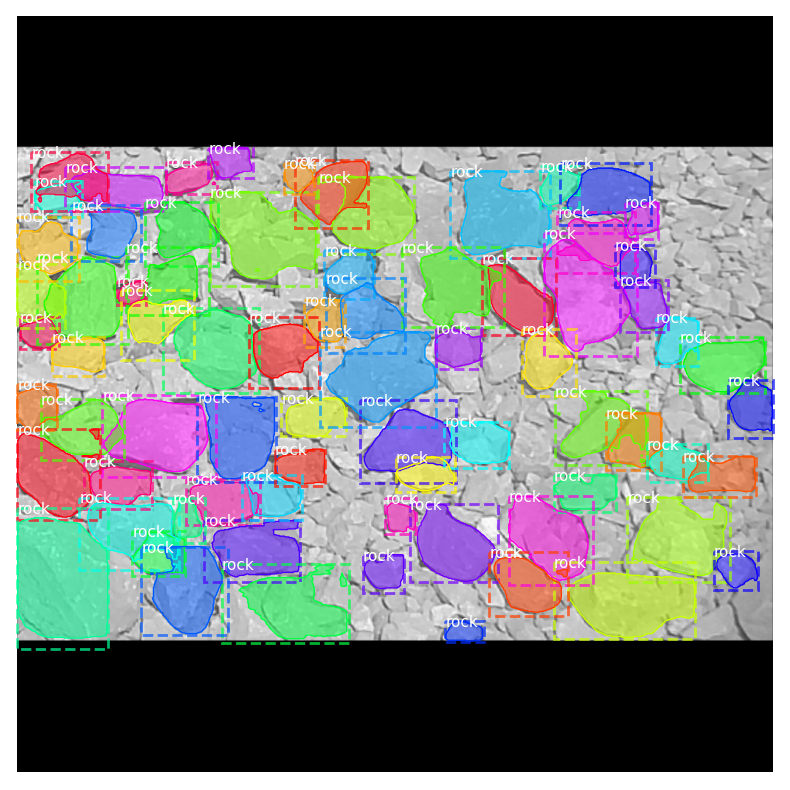

In [41]:
r = results[0]
visualize.display_instances(original_image , r['rois'], r['masks'], r['class_ids'], dataset_val.class_names, r['scores'], ax=get_ax())
print(r['class_ids'].shape)
visualize.display_instances(original_image , r['rois'], r['masks'], r['class_ids'],  dataset_val.class_names, ax=get_ax())

In [ ]:
from mrcnn import utils
from mrcnn import utils_confusion
import pandas as pd
import numpy as np
import os
gt_tot = np.array([])
pred_tot = np.array([])
#mAP list
mAP_ = []

In [ ]:
for image_id in dataset_test.image_ids:
  image, image_meta, gt_class_id, gt_bbox, gt_mask =\
   modellib.load_image_gt(dataset_test, config, image_id, use_mini_mask=False)
  info=dataset_test.image_info[image_id]

  results = model.detect([image], verbose=1)
  r = results[0]

  gt, pred = utils_confusion.gt_pred_lists(gt_class_id,gt_bbox, r['class_ids'],  r['rois'])

  gt_tot = np.append(gt_tot, gt_class_id)
  pred_tot=np.append(pred_tot, pred)

  AP_, precision_, recall_, overlap_ = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,r['rois'], r['class_ids'], r['scores'], r['masks'])

  print("the actual len of the gt vect is : ", len(gt_tot))
  print("the actual len of the pred vect is : ", len(pred_tot))

  mAP_.append(AP_)

In [ ]:
gt_tot=gt_tot.astype(int)
pred_tot=pred_tot.astype(int)
save_dir = "output"
gt_pred_tot_json = {"gt_tot" : gt_tot, "pred_tot" : pred_tot}
df = pd.DataFrame(gt_pred_tot_json)
if not os.path.exists(save_dir):
  os.makedirs(save_dir)
df.to_json(os.path.join(save_dir ,"gt_pred_test.json"))

In [ ]:
print("ground truth list : ",gt_tot)
print("predicted list : ",pred_tot)
tp,fp,fn=utils_confusion.plot_confusion_matrix_from_data(gt_tot,pred_tot,fz=18, figsize=(20,20), lw=0.5)

In [ ]:
#Se extraen los datos de p r d i d a s y se muestran con el tensorflow
import tensorflow.compat.v1 as tf
%load_ext tensorboard
sess = tf.Session()
path_logs = "/content/logs"
file_writer = tf.summary.FileWriter( path_logs , sess.graph )
%tensorboard --logdir /content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/